# Bistability plot with atomic collisions included

# Parameters

In [1]:
%run ./parameters.ipynb

One dimensionality satisfied
RHS is greater then LHS by, 11.816 times
drive power =  8.584293215184512e-10
eta_l and eta_p :  450.0547675537846 4.500547675537846
omega_c =  172.268
omega_d =  126.564
omega_c-omega_d =  45.704
g_prime/gamma_0 =  0.053
number of thermal photons in atomic modes c and d:  2.963996425317431e-180 1.264118188079506e-132


# Bistability equation

The cubic equation in terms of $N_0$ is:

$$
G^4 \Omega^2 N_0^3  + 2 G^2 \tilde{\Delta }\Omega N_0^2 + \left(\tilde{\Delta
	}^2+\frac{\kappa ^2}{4}\right)N_0  - |\varepsilon_l|^2 = 0\quad\left(\varepsilon_l = \sqrt{\frac{\mu\kappa \mathcal{P}_l}{\hbar\omega_l}}\;\left[T^{-1}\right],\; \Omega = \frac{\omega_d + \omega_c + 4\tilde{g}N}{(\omega_d + 4\tilde{g}N)(\omega_c + 4\tilde{g}N) - 4\tilde{g}^2 N^2}\; \left[T\right] \right)
$$

here, $\Omega$ has dimension of time, $\left[T\right]$, $N_0 = |\alpha|^2$. The coefficients of $N_0 = |\alpha|^2$ are,

$$
\begin{align}
a &= G^4 \Omega^2 \\
%
b &= 2 G^2 \tilde{\Delta }\Omega\\
%
c &= \left(\tilde{\Delta}^2+\frac{\kappa ^2}{4}\right)\\
%
d & = - |\varepsilon_l|^2
\end{align}
$$

Here, $\varepsilon_l$ has dimension of $\left[T^{-1}\right]$ and

$$
\begin{align}
\tilde{\Delta} &= \Delta_0 - U_0\frac{N}{2},\quad\left(\Delta_0 = \omega_l - \omega_0\right)\\
%
U_0 &= \frac{g^2_a}{\Delta_a}
%
\end{align}
$$

Where, $\Delta_a$ is the detuning of the optical frequency from the atomic transition, $g_a$ is the strength of the interaction between one photon an one atom, $N$ is the number of atoms

#### Critical detuning
$$
\tilde{\Delta} = -\frac{\sqrt{3}\kappa}{2}
$$

#### Critical power
$$
\mathcal{P}_{\text{cr}} = \frac{\hbar\omega_l\kappa^2}{3\sqrt{3}G^2\Omega\mu}
$$

# Be careful ! 
#### when normalizing the bistability equation w.r.t $\omega_c$, the bistability equation will look like:

$$
G^4 \bar{\Omega}_1^2 N_0^3  +2 G^2 \tilde{\Delta}\bar{\Omega}_1 N_0^2 + \left(\tilde{\Delta
	}^2+\frac{\kappa^2}{4}\right)N_0  - |\varepsilon_l|^2 = 0 \quad\left(\bar{\Omega}_1 = \frac{1+\omega_d + 4\tilde{g}N}{\left(\omega_d + 4\tilde{g}N\right)\left(1 + 4\tilde{g}N\right) - 4\tilde{g}^2 N^2}\right)
$$

Here, everything is normalized w.r.t $\omega_c$

#### Also be careful when normalizing $\varepsilon$
$\varepsilon$ has the dimension $s^{-1}$ so it needs normalization as well

#### When normalized w.r.t $\kappa$ the bistability equation will look like:
$$
G^4 \bar{\Omega}_2^2 N_0^3  +2 G^2 \tilde{\Delta}\bar{\Omega}_2 N_0^2 + \left(\tilde{\Delta
	}^2+\frac{1}{4}\right)N_0  - |\varepsilon_l|^2 = 0 \quad\left(\bar{\Omega}_2 = \frac{\omega_d + \omega_c + 4\tilde{g}N}{(\omega_d + 4\tilde{g}N)(\omega_c + 4\tilde{g}N) - 4\tilde{g}^2 N^2}\right)
$$

where, everything is normalized w.r.t $\kappa$


# Main code

#### Function defintions

In [2]:
# function that finds the real roots and returns the largest real root
def find_real_root(G, Delta, eps_l):
    global capital_omega_bar, kappa
    
    a = G**4*capital_omega_bar**2
    b = 2*G**2*Delta*capital_omega_bar
    c = Delta**2 + (kappa**2)/4
    d = -np.abs(eps_l)**2

    # Create a list of coefficients for numpy.roots()
    coefficients = [a, b, c, d]

    # Calculate all roots
    roots = np.roots(coefficients)

    # Filter for real roots
    real_roots = [root.real for root in roots if np.isclose(root.imag, 0)]

    return np.array(real_roots).min()

In [3]:
# Define an array to store the detuning values
detuning_range = (2*delta_tilde, -2*delta_tilde)

n_d = 1000        # number of points along detuning axis

detuning = np.linspace(detuning_range[0], detuning_range[1], n_d)

step_size = np.abs((detuning_range[0]-detuning_range[1])/n_d)

In [4]:
# define a list to store the roots of the cubic polynomial
cubic_roots = [[0]*3 for i in range(n_d)]

# the lits cubic_roots is define in this manner: [[0,0,0], [0,0,0], ......, [0,0,0]] each of those, [0,0,0] arrays correspond to the values of cube root at a particular detuning.

for index, item in enumerate(detuning):
    
    delta = item

    a3 = G**4*capital_omega_bar**2
    a2 = 2*G**2*delta*capital_omega_bar

    
    a1 = kappa**2/4 + delta**2
    
    a0 = -np.abs(eta_l)**2
    
    coeff = [a3, a2, a1, a0]
    
    cubic_roots[index] = np.roots(coeff)       # Note: the function np.roots takes the coefficents in descending order of power and returns value of the three roots.

# Collect only the real roots

In [5]:
real_roots = [[0]*3 for i in range(n_d)]       # define a list to collect the roots that are real.

for index, roots in enumerate(cubic_roots):
    if roots[0].imag == 0.0:
        real_roots[index][0] = roots[0].real
    if roots[1].imag == 0.0:
        real_roots[index][1] = roots[1].real
    if roots[2].imag == 0.0:
        real_roots[index][2] = roots[2].real

# for example, if the first root is real and the other two are complex, then at that particular detuning, real_roots will be [value, 0,0]

In [6]:
# define arrays to store all three roots seperately for all value of detuning
third_root = [0 for i in range(n_d)]      
second_root = [0 for i in range(n_d)]
first_root = [0 for i in range(n_d)]

for index, roots in enumerate(real_roots):
    third_root[index] = roots[2]
    second_root[index] = roots[1]
    first_root[index] = roots[0]

# Convert the lists to arrays

In [7]:
third_root = np.array(third_root).astype(np.float32)
second_root = np.array(second_root).astype(np.float32)
first_root = np.array(first_root).astype(np.float32)

The reason for converting the the above arrays to float is because we want to replace the elements with value 0 by nan. And its not allowed to convert integer zero to nan

# Remove datapoints which are zero

In [8]:
# we don't want to plot the datapoints which are zero, therefore we will replace any zero with "nan" (not a number)
y1 = first_root.copy()
y1[first_root == 0.0] = np.nan      # replacing the points which are zero with nan
y2 = second_root.copy()
y2[second_root == 0.0] = np.nan     # replacing the points which are zero with nan
y3 = third_root.copy()
y3[third_root == 0.0] = np.nan      # replacing the points which are zero with nan

# Plotting

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True    # command for using LateX text in figures

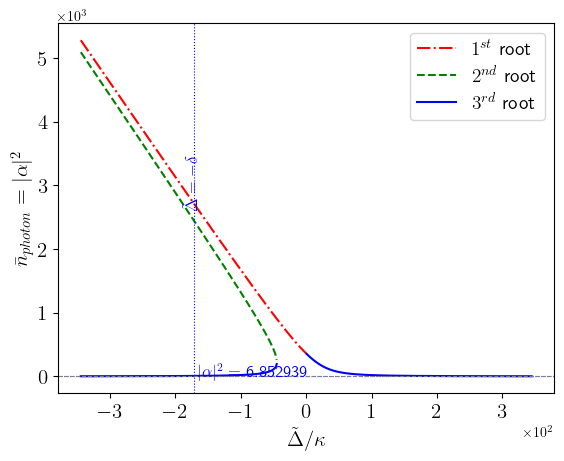

In [10]:
plt.plot(detuning, y1, 'r-.')
plt.plot(detuning, y2, 'g--')
plt.plot(detuning, y3, 'b-')

# Legends
plt.legend([r'$1^{st}$ root', r'$2^{nd}$ root', r'$3^{rd}$ root'], loc="upper right", fontsize = 14)

# axis labels
plt.xlabel(r'$\tilde{\Delta}/\kappa$',  fontsize = 15)
plt.ylabel(r'$\bar{n}_{photon} = |\alpha|^2$',  fontsize = 15)


#######################################################
#          Vertical lines
#######################################################
# Plot a vertical line at detuning = omega_c
plt.axvline(x=-small_delta, color='blue', linestyle=':', linewidth = 0.8)


######################################################
#          Horizontal lines
######################################################
y_coordinate = find_real_root(G, delta_tilde, eta_l)      # this is the theoretical value of the photon number at the desired detuning

# Plot a horizonal line through the intersection point of x= -small_delta and the plot
plt.axhline(y=y_coordinate, color='blue', linestyle=':', linewidth = 0.8)

plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')

######################################################
#          Texts on the plot
######################################################

# Add text at x = - omega_c
y_min, y_max = plt.ylim()  # Get the limits of the y-axis
y_center = (y_min + y_max)/ 2  # Calculate the center of the y-axis

plt.text(-small_delta - 20*step_size, y_center, r'$\tilde{\Delta} = -\delta$', rotation=90, color='b', fontsize = '12')

plt.text(-small_delta + 10*step_size, y_coordinate + 1e-1/4, r'$|\alpha|^2 = $ %f' %y_coordinate, rotation=0, color='b', fontsize = '12')

# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# axis ticks
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15) 


plt.show()


#### Find the value of the photon number, $\bar{n}_{photon} = |\alpha|^2$ at a particular detuning.
From the value of $|\alpha|^2$ we can calculate,

$$
Q_{c(d)s}=  -G\frac{|\alpha|^2}{\omega_{c(d)}} = -G\frac{\bar{n}_{photon}}{\omega_{c(d)}}
$$

In [11]:
# What is the detuning at which you want to find the photon number
x = -small_delta
index = np.where((detuning > x- step_size/2) & (detuning < x + step_size/2)) # the "where" function gives the corresponding index in the detuning array

# store the value of the first, second, and third roots into some variables at that value of detuning
a = y1[index]
b = y2[index]
c = y3[index]

temp_array = np.array([a, b, c])
#print(y1[index], y2[index], y3[index])

# Collect elements that are not NaN
non_nan_elements = temp_array[~np.isnan(temp_array)].min()   # retuns the non-nan elements. If there are multiple non-nan elements, it returns the min value.

sorted_array = np.sort(temp_array)


photon_number  = non_nan_elements

print("photon number at (delta_tilde = -small_delta) is", photon_number)


photon number at (delta_tilde = -small_delta) is 6.866789


#### Verify whether the above value matches with the formula

In [12]:
# calculate alpha_s    
denominator = (omega_c + 4*g_tilde*Na)*(omega_d + 4*g_tilde*Na) - 4*g_tilde**2*Na**2
Q_cs = -G*photon_number*(omega_d + 2*g_tilde*Na)/denominator
Q_ds = -G*photon_number*(omega_c + 2*g_tilde*Na)/denominator
alpha_s = eta_l/(1j*(G*(Q_cs + Q_ds) - delta_tilde) + kappa/2)

In [13]:
print("Q_cs =", Q_cs, "and Q_ds =", Q_ds)
# print("alpha_s = ", alpha_s)
print("|alpha_s|^2 (photon number) = ", np.round(np.abs(alpha_s)**2, 3))

Q_cs = -0.08776534651866302 and Q_ds = -0.1194450030196379
|alpha_s|^2 (photon number) =  6.853


#### Value of $|\tilde{G}| = \frac{G|\alpha|}{\sqrt{2}}$

In [14]:
G_tilde_val = alpha_s*G/np.sqrt(2)
print("G_tilde = ",np.round(np.abs(G_tilde_val),3))

G_tilde =  4.08


#### Verification of the relation

$$
\hbar U_0|\alpha|^2 <<\frac{\hbar^2 L_p^2}{2mR^2} + 2\hbar\tilde{g}N
$$

In [15]:
LHS = hbar*U_0*np.abs(alpha_s)**2

RHS = (hbar*Lp)**2/(2*mass*Radius**2) + 2*hbar*g_tilde_0*Na

if LHS < RHS:
    print("Criterion satisfied")
    criterion = 1
else:
    print("criterion not satisfied")
    criterion = 0

print("ratio of RHS by LHS: ",RHS/LHS)

print("LHS", LHS/hbar)
print("K.E", hbar*Lp**2/(2*mass*Radius**2))
print("Coll", 2*g_tilde_0*Na)

Criterion satisfied
ratio of RHS by LHS:  3.086464385691955
LHS 1898.0997665922864
K.E 5522.4173300773045
Coll 336.0000000000001


#### Scattering rate

In [16]:
intracavity_photon_number = np.abs(alpha_s)**2

photon_lifetime_inside_cavity = 1/kappa_0


intracavity_power = hbar*omega_l0/photon_lifetime_inside_cavity
#intracavity_power = power_l

area_of_cross_section = pi*Radius**2

intracavity_intensity = intracavity_power/area_of_cross_section

scattering_rate = (gamma_a**3/(8*delta_a**2))*(intracavity_intensity/I_sat)

if scattering_rate<1:
    print('scattering rate less than 1')
    scattering_parameter = 1
else:
    print('scattering rate greater than 1')
    scattering_parameter = 0

print("scattering rate",scattering_rate)

scattering rate less than 1
scattering rate 5.768559671149552e-06


#### Stability test

In [17]:
import numpy as np
import scipy.linalg as la

# Construct the Jacobian matrix J
Jacobian = np.array([
[-kappa / 2, G * (Q_cs + Q_ds) - delta_tilde, 1j * G * (np.conj(alpha_s) - alpha_s), 0, 1j * G * (np.conj(alpha_s) - alpha_s), 0],
[- (G * (Q_cs + Q_ds) - delta_tilde), -kappa / 2, -G * (np.conj(alpha_s) + alpha_s), 0, -G * (np.conj(alpha_s) + alpha_s), 0],
[0, 0, 0, omega_c + 4 * g_tilde * Na, 0, -2 * g_tilde * Na],
[-G*(alpha_s + np.conj(alpha_s))/np.sqrt(2) , -1j*G*(np.conj(alpha_s) - alpha_s/np.sqrt(2)), -(omega_c + 4 * g_tilde * Na), -gamma_m / 2, -2 * g_tilde * Na, 0],
[0, 0, 0, -2 * g_tilde * Na, 0, omega_d + 4 * g_tilde * Na],
[-G*(alpha_s + np.conj(alpha_s))/ np.sqrt(2), -1j*G* (np.conj(alpha_s) - alpha_s)/ np.sqrt(2) , -2 * g_tilde * Na, 0, -(omega_d + 4 * g_tilde * Na), -gamma_m / 2]
], dtype=np.complex128)

# Calculate the eigenvalues of the Jacobian matrix
eigenvalues_of_Jacobian = la.eigvals(Jacobian)

# Check stability: if all real parts of the eigenvalues are negative, the system is stable
stability = np.all(np.real(eigenvalues_of_Jacobian ) < 0)

#Print the eigenvalues
print("Real part of the eigenvalues of the Jacobian matrix are:", np.real(eigenvalues_of_Jacobian))

#print the real parts of the eigen values with positive real part
print("Eigen values with positive real part", np.real(eigenvalues_of_Jacobian[np.real(eigenvalues_of_Jacobian)>0]))

if stability:
    print("The system is stable.")
else:
    print("The system is unstable.")


Real part of the eigenvalues of the Jacobian matrix are: [-0.24721298 -0.24708444 -0.00562817 -0.2446426  -0.24980958 -0.00563889]
Eigen values with positive real part []
The system is stable.
